In [38]:
import time
import numpy as np
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import feather 
from mailerWithUtf8 import mail
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json

# preprocess load data

In [39]:
start_time = time.time()
path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_train.feather' 
# path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_train_sample.feather' 
train_df = feather.read_dataframe(path)
print('load feather %s seconds', format(time.time() - start_time))


load feather %s seconds 1.5008654594421387


In [40]:
start_time = time.time()
path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_test.feather'
# path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_test_sample.feather' 

test_df = feather.read_dataframe(path)
print('load feather %s seconds', format(time.time() - start_time))

load feather %s seconds 0.3840045928955078


In [42]:
train_x, train_y = train_df.iloc[:, 0:-1].values, train_df.iloc[:, -1].values

In [43]:
test_x, test_y = test_df.iloc[:, 0:-1].values, test_df.iloc[:, -1].values

In [44]:
train_x = train_x.reshape(train_x.shape[0], -1)   # normalize
test_x = test_x.reshape(test_x.shape[0], -1)   # normalize



In [45]:
# from sklearn.preprocessing import LabelBinarizer
# encoder = LabelBinarizer()
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.fit_transform(y_test)

In [46]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_y)
encoded_Y = encoder.transform(train_y)
# convert integers to dummy variables (i.e. one hot encoded)
train_y = np_utils.to_categorical(encoded_Y)

encoded_Y = encoder.transform(test_y)
# convert integers to dummy variables (i.e. one hot encoded)
test_y = np_utils.to_categorical(encoded_Y)

In [47]:
# get y unique name
encoder.classes_

array(['Adult', 'Game', 'HomeLife', 'Infrequent Internet User',
       'InstantMessage-High', 'InstantMessage-Low', 'Map', 'News',
       'No significant preference', 'Portal', 'Social-media'], dtype=object)

In [48]:
len(train_y)

1506103

In [49]:
len(test_y)

376526

# construct and compile model

In [50]:
classify_num = 11
epochs = 300
batch = 128

# basic config

In [52]:
start_time = time.time()
print ('Compiling Model ... ')
model = Sequential()
model.add(Dense(256, input_shape=train_x[0].shape ))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(classify_num))
model.add(Activation('softmax'))

rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

print('Model compield in {0} seconds'.format(time.time() - start_time))


Compiling Model ... 
Model compield in 0.28941941261291504 seconds


# Train model

In [53]:
start_time = time.time()
print('Training model...')
model.fit(train_x, train_y , epochs=epochs, batch_size=batch,
          shuffle=True,validation_split=0.1, verbose=2)
print("Training duration : {0}".format(time.time() - start_time))


Training model...
Train on 1355492 samples, validate on 150611 samples
Epoch 1/300
52s - loss: 1.9661 - acc: 0.2946 - val_loss: 1.9296 - val_acc: 0.3042
Epoch 2/300
54s - loss: 1.9305 - acc: 0.3051 - val_loss: 1.9195 - val_acc: 0.3085
Epoch 3/300
53s - loss: 1.9218 - acc: 0.3073 - val_loss: 1.9099 - val_acc: 0.3112
Epoch 4/300
51s - loss: 1.9189 - acc: 0.3084 - val_loss: 1.9057 - val_acc: 0.3118
Epoch 5/300
52s - loss: 1.9170 - acc: 0.3093 - val_loss: 1.9090 - val_acc: 0.3115
Epoch 6/300
54s - loss: 1.9169 - acc: 0.3096 - val_loss: 1.9028 - val_acc: 0.3154
Epoch 7/300
53s - loss: 1.9158 - acc: 0.3102 - val_loss: 1.9082 - val_acc: 0.3132
Epoch 8/300
55s - loss: 1.9159 - acc: 0.3105 - val_loss: 1.9105 - val_acc: 0.3136
Epoch 9/300
54s - loss: 1.9177 - acc: 0.3107 - val_loss: 1.9077 - val_acc: 0.3140
Epoch 10/300
52s - loss: 1.9166 - acc: 0.3108 - val_loss: 1.8988 - val_acc: 0.3171
Epoch 11/300
54s - loss: 1.9156 - acc: 0.3113 - val_loss: 1.9062 - val_acc: 0.3131
Epoch 12/300
52s - loss: 

50s - loss: 1.9724 - acc: 0.3104 - val_loss: 1.9477 - val_acc: 0.3167
Epoch 100/300
50s - loss: 1.9645 - acc: 0.3110 - val_loss: 1.9409 - val_acc: 0.3172
Epoch 101/300
49s - loss: 1.9615 - acc: 0.3108 - val_loss: 1.9467 - val_acc: 0.3157
Epoch 102/300
47s - loss: 1.9573 - acc: 0.3109 - val_loss: 1.9450 - val_acc: 0.3178
Epoch 103/300
46s - loss: 1.9587 - acc: 0.3108 - val_loss: 1.9396 - val_acc: 0.3172
Epoch 104/300
46s - loss: 1.9598 - acc: 0.3109 - val_loss: 1.9439 - val_acc: 0.3169
Epoch 105/300
46s - loss: 1.9656 - acc: 0.3108 - val_loss: 1.9539 - val_acc: 0.3094
Epoch 106/300
46s - loss: 1.9787 - acc: 0.3100 - val_loss: 1.9579 - val_acc: 0.3169
Epoch 107/300
46s - loss: 1.9766 - acc: 0.3099 - val_loss: 1.9482 - val_acc: 0.3151
Epoch 108/300
46s - loss: 1.9817 - acc: 0.3101 - val_loss: 1.9584 - val_acc: 0.3135
Epoch 109/300
46s - loss: 1.9798 - acc: 0.3093 - val_loss: 1.9526 - val_acc: 0.3112
Epoch 110/300
47s - loss: 1.9860 - acc: 0.3095 - val_loss: 1.9526 - val_acc: 0.3148
Epoch 

46s - loss: 1.9847 - acc: 0.3102 - val_loss: 1.9671 - val_acc: 0.3159
Epoch 198/300
46s - loss: 1.9865 - acc: 0.3102 - val_loss: 1.9547 - val_acc: 0.3179
Epoch 199/300
46s - loss: 1.9867 - acc: 0.3104 - val_loss: 1.9533 - val_acc: 0.3170
Epoch 200/300
46s - loss: 1.9856 - acc: 0.3101 - val_loss: 1.9652 - val_acc: 0.3174
Epoch 201/300
46s - loss: 1.9884 - acc: 0.3105 - val_loss: 1.9640 - val_acc: 0.3168
Epoch 202/300
46s - loss: 1.9999 - acc: 0.3102 - val_loss: 1.9751 - val_acc: 0.3164
Epoch 203/300
46s - loss: 2.0082 - acc: 0.3102 - val_loss: 1.9614 - val_acc: 0.3163
Epoch 204/300
46s - loss: 2.0022 - acc: 0.3104 - val_loss: 2.0219 - val_acc: 0.3139
Epoch 205/300
46s - loss: 2.0117 - acc: 0.3105 - val_loss: 2.0908 - val_acc: 0.3137
Epoch 206/300
47s - loss: 2.0115 - acc: 0.3101 - val_loss: 1.9744 - val_acc: 0.3145
Epoch 207/300
46s - loss: 2.0236 - acc: 0.3104 - val_loss: 1.9689 - val_acc: 0.3170
Epoch 208/300
46s - loss: 2.0216 - acc: 0.3105 - val_loss: 1.9978 - val_acc: 0.3163
Epoch 

46s - loss: 1.9960 - acc: 0.3090 - val_loss: 2.0105 - val_acc: 0.2979
Epoch 296/300
46s - loss: 2.0177 - acc: 0.3091 - val_loss: 1.9820 - val_acc: 0.3115
Epoch 297/300
46s - loss: 1.9951 - acc: 0.3094 - val_loss: 2.0822 - val_acc: 0.3123
Epoch 298/300
46s - loss: 1.9968 - acc: 0.3093 - val_loss: 1.9979 - val_acc: 0.2994
Epoch 299/300
46s - loss: 2.0048 - acc: 0.3095 - val_loss: 1.9629 - val_acc: 0.3080
Epoch 300/300
46s - loss: 1.9961 - acc: 0.3093 - val_loss: 1.9539 - val_acc: 0.3144
Training duration : 14595.872691869736


In [54]:
train_time = time.time() - start_time

# save model

In [55]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 


Saved model to disk


# test model and get accuracy

In [56]:
test_batch = 32
loss, accuracy = model.evaluate(test_x, test_y, batch_size=test_batch)

376526/376526 [==============================] - 16s    


In [57]:
print("%s: %.2f%%" % (model.metrics_names[1], accuracy*100))


acc: 31.29%


# send mail to alert

In [58]:
model_config = []
for index, layer in enumerate(model.get_config()):
    model_config.append("layer - > %d===============" % index)
    model_config.append("class_name = " + layer["class_name"] )
    if(str(layer["config"].get("units", "None")) != "None"):
        model_config.append("units = " + str(layer["config"].get("units", "None")))
    if(str(layer["config"].get("activation", "None")) != "None"):
        model_config.append("activation = " + layer["config"]["activation"])
    if(str(layer["config"].get("rate", "None")) != "None"):
        model_config.append("rate = " + str(layer["config"]["rate"]))
model_info = '\n'.join(model_config)

In [59]:
model_info += "\n\ntrain epochs = " + str(epochs)
model_info += "\ntrain batch = " + str(batch)
model_info += "\ntest batch = " + str(test_batch)
model_info += "\ntrain time = " + str(train_time)
model_info += "\nloss = " + str(loss)
model_info += "\n\n\naccuracy = " + str(accuracy)



In [60]:
test=mail()
test.main("model finished", model_info)

Start Send Mail
User Email : a - DONE 
User Email : a - DONE 
User Email : 2 - DONE 
User Email : 6 - DONE 
User Email : 3 - DONE 
User Email : 6 - DONE 
User Email : 5 - DONE 
User Email : 5 - DONE 
User Email : 6 - DONE 
User Email : 6 - DONE 
User Email : @ - DONE 
User Email : g - DONE 
User Email : m - DONE 
User Email : a - DONE 
User Email : i - DONE 
User Email : l - DONE 
User Email : . - DONE 
User Email : c - DONE 
User Email : o - DONE 
User Email : m - DONE 
Finish Send Mail


# write readme to report the model

In [61]:
md_info = model_info.replace("\n", "<br>")
with open('readme.md', 'w+') as f:
     f.write(md_info)
f.closed

True

In [62]:
print(model_info)

layer - > 0===============
class_name = Dense
units = 256
activation = linear
layer - > 1===============
class_name = Activation
activation = relu
layer - > 2===============
class_name = Dropout
rate = 0.2
layer - > 3===============
class_name = Dense
units = 128
activation = linear
layer - > 4===============
class_name = Activation
activation = relu
layer - > 5===============
class_name = Dropout
rate = 0.2
layer - > 6===============
class_name = Dense
units = 64
activation = linear
layer - > 7===============
class_name = Activation
activation = relu
layer - > 8===============
class_name = Dense
units = 32
activation = linear
layer - > 9===============
class_name = Activation
activation = relu
layer - > 10===============
class_name = Dense
units = 11
activation = linear
layer - > 11===============
class_name = Activation
activation = softmax

train epochs = 300
train batch = 128
test batch = 32
train time = 14595.877679347992
loss = 1.95676832638


accuracy = 0.31286020089


In [63]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [64]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [65]:
pred = model.predict(test_x)

In [66]:
cnf_matrix = confusion_matrix(np.argmax(test_y, axis = 1), np.argmax(pred, axis = 1))
cnf_matrix

array([[    0,     0,     0,   162,  4860,  1976,     1,     0,  3618,
          263,     0],
       [    0,     0,     0,  1029,  9541,  3592,     0,     0,  2935,
          194,     0],
       [    0,     0,     0,   312,  5476,  5848,     1,     0,  3183,
          210,     0],
       [    0,     0,     0, 17455, 10011,   164,     0,     0,  1312,
           23,     0],
       [    0,     0,     0,  7065, 53749, 17256,     0,     0,  6475,
          374,     3],
       [    0,     0,     0,  2382, 41973, 31262,     2,     0,  9980,
          576,     2],
       [    0,     0,     0,   154,  7401, 13057,     0,     0,   388,
           20,     1],
       [    0,     0,     0,   908,  7134,  1289,     1,     0,  1981,
           61,     0],
       [    0,     0,     0,  2906, 24377, 10818,     2,     0, 14811,
          490,     0],
       [    0,     0,     0,  1424, 10578,  1255,     0,     0,  5788,
          522,     0],
       [    0,     0,     0,  1488, 17331,  5111,     0,    

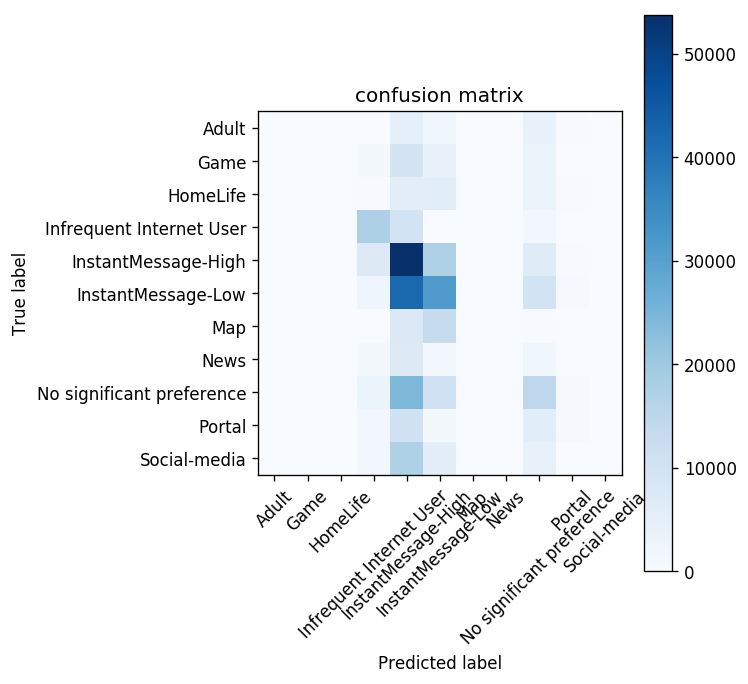

In [67]:
np.set_printoptions(precision=2)
plt.figure(figsize=(6, 6), dpi = 120)
plot_confusion_matrix(cnf_matrix, classes=encoder.classes_, normalize=True, title='confusion matrix')
plt.show()

In [110]:
# for i in range(10):
#     probabilities = model.predict(test_x[i:i+1,:], batch_size=32, verbose=0)
#     probabilities = model.predict(test_x[i:i+1,:])
#     probabilities = model.predict(test_x)
#     probabilities[probabilities>=0.5] = 1
#     probabilities[probabilities<0.5] = 0
#     print(probabilities)

[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
